In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter


In [2]:
def get_min_max_frequency(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)

    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Display the spectrogram
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')

    # Extract frequencies from the axes
    freqs = plt.yticks()[0]
    min_frequency = freqs[0]
    max_frequency = freqs[-1]

    return min_frequency, max_frequency

Minimum Frequency: 0.0 Hz
Maximum Frequency: 8192.0 Hz


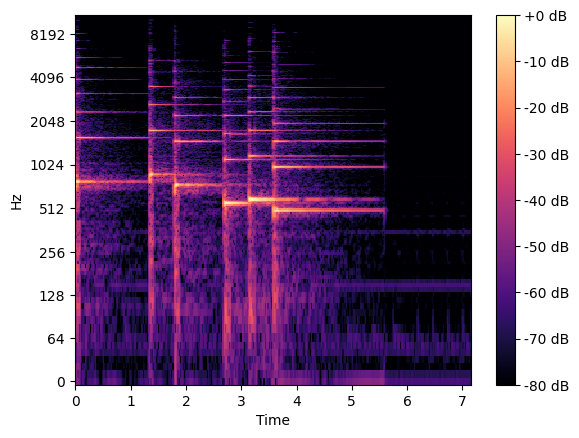

In [14]:
file_path = './data/piano.wav'
min_freq, max_freq = get_min_max_frequency(file_path)
print(f"Minimum Frequency: {min_freq} Hz")
print(f"Maximum Frequency: {max_freq} Hz")
plt.show()

In [9]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def limit_to_band(input_file, output_file, lowcut, highcut):
    # Read the WAV file
    fs, y = wavfile.read(input_file)

    # Ensure mono by taking the first channel if stereo
    if len(y.shape) > 1:
        y = y[:, 0]

    # Apply the bandpass filter
    y_filtered = butter_bandpass_filter(y, lowcut, highcut, fs)
    print(y_filtered)
    y_filtered=np.int16(y_filtered)

    # Write the output to a new WAV file
    wavfile.write(output_file, fs, y_filtered)

In [18]:
input_file = "./data/piano.wav"
output_file = "pianoMod.wav"
lowcut = 512  # Lower cutoff frequency in Hz
highcut = 1000  # Upper cutoff frequency in Hz

limit_to_band(input_file, output_file, lowcut, highcut)
#pianoMod.wav is the output file ferquency limited to 512-1000 Hz


[-1.00019195e-06 -1.55454066e-05 -1.10782642e-04 ... -3.10840292e+00
 -4.02838308e+00 -4.87038192e+00]


Minimum Frequency: 0.0 Hz
Maximum Frequency: 8192.0 Hz


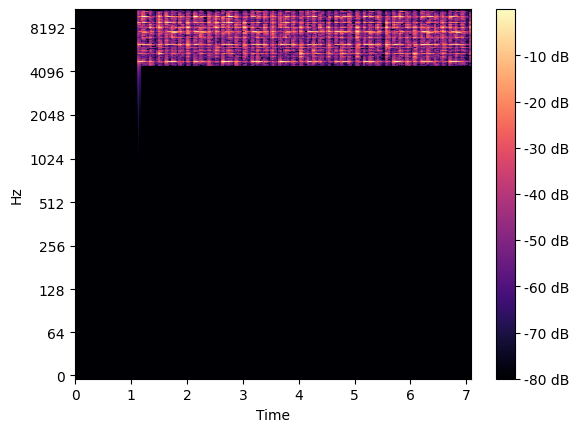

In [16]:
file_path = './data/Triangle(4500-20000).wav'
min_freq, max_freq = get_min_max_frequency(file_path)
print(f"Minimum Frequency: {min_freq} Hz")
print(f"Maximum Frequency: {max_freq} Hz")
plt.show()

In [19]:
input_file = "./data/Triangle(4500-20000).wav"
output_file = "trigMod.wav"
lowcut = 4500  # Lower cutoff frequency in Hz
highcut = 6000  # Upper cutoff frequency in Hz

limit_to_band(input_file, output_file, lowcut, highcut)
#trigMod.wav is the output file ferquency limited to 4500-6000 Hz

[ 1.00407869e-05  4.88280257e-05  8.23621914e-05 ... -9.89545662e+01
 -1.92776367e+00  9.52588336e+01]


C:\Users\abdue\AppData\Local\Temp\ipykernel_26676\1311248728.py:15: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, y = wavfile.read(input_file)


Minimum Frequency: 0.0 Hz
Maximum Frequency: 8192.0 Hz


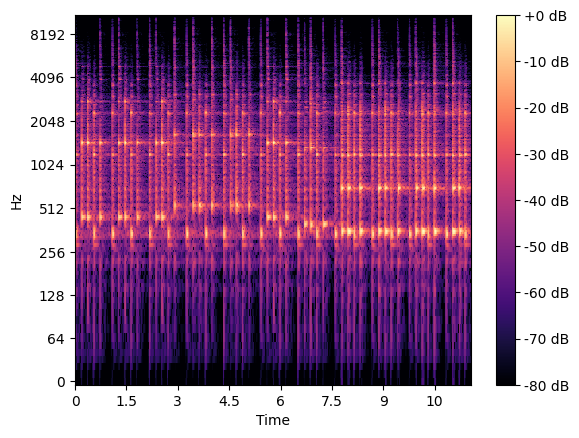

In [29]:
file_path = './data/Xylophone (1).wav'
min_freq, max_freq = get_min_max_frequency(file_path)
print(f"Minimum Frequency: {min_freq} Hz")
print(f"Maximum Frequency: {max_freq} Hz")
plt.show()

In [39]:
input_file = "./data/Xylophone (1).wav"
output_file = "xylogMod.wav"
lowcut = 2000  # Lower cutoff frequency in Hz
highcut = 3000  # Upper cutoff frequency in Hz

limit_to_band(input_file, output_file, lowcut, highcut)
#xylogMod.wav is the output file ferquency limited to 2000-3000 Hz

[ 0.          0.          0.         ... 47.93607815 43.56942791
 39.02055379]


Minimum Frequency: 0.0 Hz
Maximum Frequency: 8192.0 Hz


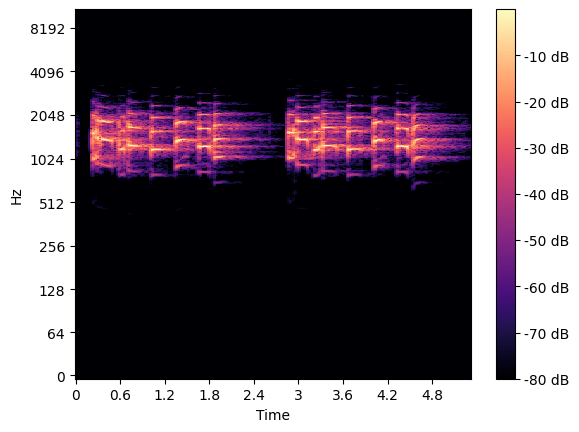

In [40]:
file_path = './data/trumpetmod.wav'
min_freq, max_freq = get_min_max_frequency(file_path)
print(f"Minimum Frequency: {min_freq} Hz")
print(f"Maximum Frequency: {max_freq} Hz")
plt.show()